In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os, warnings

import cv2 as cv

import matplotlib.pyplot as plt

img_path = "../input/utkface-new/UTKFace"

img_files = os.listdir(img_path)

SAMPLE_SIZE = 10000
IMAGE_SIZE = 128

labels = []
images = []

i = 0
while(i < SAMPLE_SIZE):
    labels.append([[int(img_files[i].split('_')[0])], [int(img_files[i].split('_')[1])]])
    
    img = cv.imread(img_path + '/' + img_files[i])
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    images.append(img)
    
    i += 1

In [35]:
X = np.array(images) / 255
Y = np.array(labels)

print(X[0:2])
print(Y[0:2])

[[[[0.05882353 0.03529412 0.03529412]
   [0.03529412 0.01960784 0.02352941]
   [0.03137255 0.01960784 0.02745098]
   ...
   [0.17647059 0.08235294 0.04705882]
   [0.23921569 0.1372549  0.11372549]
   [0.27058824 0.16078431 0.14509804]]

  [[0.06666667 0.04313725 0.04313725]
   [0.02745098 0.01176471 0.01568627]
   [0.02352941 0.01176471 0.01960784]
   ...
   [0.15294118 0.04705882 0.01960784]
   [0.21176471 0.09803922 0.07843137]
   [0.25490196 0.14117647 0.1254902 ]]

  [[0.09411765 0.06666667 0.06666667]
   [0.03137255 0.00784314 0.00784314]
   [0.01960784 0.00392157 0.00784314]
   ...
   [0.1372549  0.01960784 0.00784314]
   [0.2        0.07058824 0.05882353]
   [0.25882353 0.13333333 0.12156863]]

  ...

  [[0.18039216 0.18039216 0.18039216]
   [0.14509804 0.14509804 0.14509804]
   [0.09411765 0.09411765 0.09411765]
   ...
   [0.01568627 0.01176471 0.03137255]
   [0.01568627 0.01176471 0.03137255]
   [0.01960784 0.01568627 0.03529412]]

  [[0.15686275 0.15686275 0.15686275]
   [0.1

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

Y_train_final = [Y_train[:, 0], Y_train[:, 1]]
Y_test_final = [Y_test[:, 0], Y_test[:, 1]]

(8000, 128, 128, 3)
(2000, 128, 128, 3)


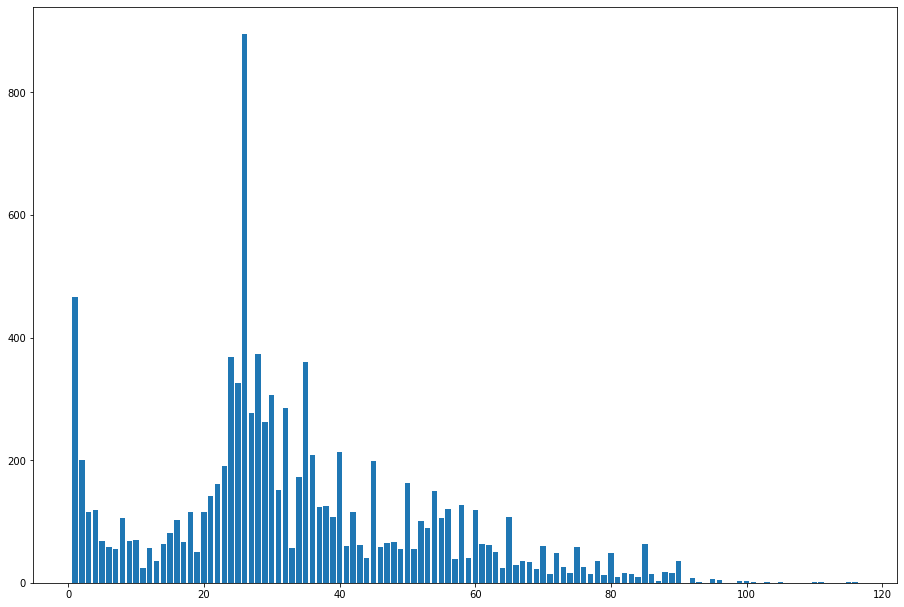

In [43]:
values, counts = np.unique(Y[:, 0], return_counts = True)

fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 2])
axes.bar(values, counts)
plt.show()

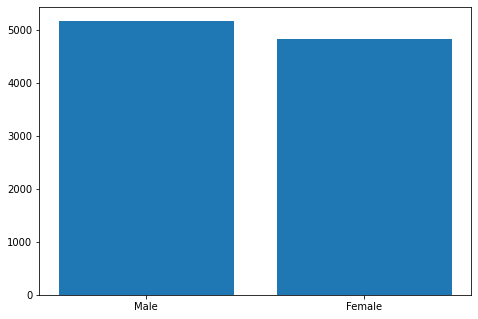

In [44]:
values, counts = np.unique(Y[:, 1], return_counts=True)

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(['Male', 'Female'], [counts[0], counts[1]])
plt.show()

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

initial_model = keras.Sequential([
    layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu', padding = 'same',
                  input_shape = [IMAGE_SIZE, IMAGE_SIZE, 3]),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),

    layers.Dense(1, activation = 'relu', name = 'age'),
    layers.Dense(1, activation = 'sigmoid', name = 'sex'),
])

model = keras.Model(
     inputs = initial_model.inputs,
     outputs = [initial_model.get_layer(name = "age").output, initial_model.get_layer(name = "sex").output]
)

model.compile(
    optimizer = 'adam',
    loss = ['mse', 'binary_crossentropy'],
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    Y_train_final,
    batch_size = 32,
    validation_data = (X_test, Y_test_final),
    epochs = 20,
)

Epoch 1/20
250/250 [==============================] - 121s 479ms/step - loss: 586.6830 - age_loss: 584.2961 - sex_loss: 2.3870 - age_accuracy: 0.0463 - sex_accuracy: 0.5202 - val_loss: 365.8314 - val_age_loss: 365.1363 - val_sex_loss: 0.6949 - val_age_accuracy: 0.0435 - val_sex_accuracy: 0.5355
Epoch 2/20
250/250 [==============================] - 118s 471ms/step - loss: 348.6539 - age_loss: 347.9648 - sex_loss: 0.6892 - age_accuracy: 0.0469 - sex_accuracy: 0.5299 - val_loss: 252.5555 - val_age_loss: 251.8831 - val_sex_loss: 0.6725 - val_age_accuracy: 0.0435 - val_sex_accuracy: 0.5460
Epoch 3/20
250/250 [==============================] - 117s 470ms/step - loss: 226.0959 - age_loss: 225.4225 - sex_loss: 0.6734 - age_accuracy: 0.0439 - sex_accuracy: 0.5392 - val_loss: 206.0919 - val_age_loss: 205.4218 - val_sex_loss: 0.6701 - val_age_accuracy: 0.0375 - val_sex_accuracy: 0.5550
Epoch 4/20
250/250 [==============================] - 118s 471ms/step - loss: 179.1629 - age_loss: 178.4868 - se

In [50]:
i = 3319
gender = ['Male', 'Female']
print("Actual Age: " + str(int(img_files[i].split('_')[0])))
print("Actual Gender: " + gender[int(img_files[i].split('_')[1])])

image = X[i]
prediction = model.predict(np.array([image]))
print("Predicted Age: " + str(int(np.round(prediction[0][0]))))
print("Predicted Gender: " + gender[int(np.round(prediction[1][0]))])


Actual Age: 55
Actual Gender: Male
Predicted Age: 52
Predicted Gender: Male
